In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 Parse Time and Merge

In [3]:
# read and check weather data
weather = pd.read_csv("weather_data.csv")
print(weather.shape)
weather.head()

(8760, 13)


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,1388534400,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,1388538000,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,1388541600,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,1388545200,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,1388548800,217,0.0,5.87,0.0


In [4]:
#parse unix time into date
weather['time'] = pd.to_datetime(weather['time'],unit='s',utc=True) # change unix time to normal time
weather['time'] = weather['time'].dt.date # get date only
weather.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,0.0,23.89,0.0
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01,195,0.0,5.87,0.0
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01,222,0.0,6.17,0.0
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01,209,0.0,5.63,0.0
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01,217,0.0,5.87,0.0


In [5]:
# read and check energy data
energy = pd.read_csv("energy_data.csv")
print(energy.shape)
energy.head()

(17520, 18)


,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,2014-01-01 00:30:00,0.656771,0.0,0.656771,0.001534,0.364338,0.005522,0.000043,0.003514,0.003512,0.004888,0.002137,0.000107,0.007221,0.064698,0.003589,0.004445,0.096008
2,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
3,2014-01-01 01:30:00,0.683979,0.0,0.683979,0.001744,0.410653,0.005556,0.000059,0.003499,0.003476,0.004911,0.002068,0.000121,0.007236,0.065032,0.003404,0.004262,0.105472
4,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798


In [6]:
# change normal time to date only
energy['Date & Time'] = pd.to_datetime(energy['Date & Time'],errors='coerce')
energy['Date & Time'] = energy['Date & Time'].dt.date
newEn = energy.groupby('Date & Time').agg('sum')
newEn.head()

,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
Date & Time,,,,,,,,,,,,,,,,,
2014-01-01,65.013592,0.0,65.013592,0.042977,8.814319,1.137579,0.750298,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.200970,4.997037,4.639598
2014-01-02,32.305336,0.0,32.305336,0.047452,10.830045,0.600321,0.323182,0.506440,0.178024,0.282479,0.798316,5.423866,0.346679,3.475469,0.207041,1.534426,3.881399
2014-01-03,31.164468,0.0,31.164468,0.055865,12.417151,0.442453,0.004276,0.507426,0.176649,0.279159,0.746972,0.005554,0.344061,3.615520,0.201975,1.667553,3.671391
2014-01-04,45.287782,0.0,45.287782,0.048827,11.147332,0.674477,1.046294,0.515988,0.180056,0.344005,0.640721,19.994908,0.346872,3.700408,0.203913,1.029198,3.357907
2014-01-05,36.316643,0.0,36.316643,0.039831,9.301135,0.686189,0.235143,0.519449,0.178556,0.348489,0.584570,9.493912,0.346070,3.699178,0.197897,1.619991,4.373730


In [7]:
# merge two table with time
total = pd.merge(weather,newEn,left_on='time',right_on='Date & Time')
total.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,...,First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.20097,4.997037,4.639598
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01,195,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.20097,4.997037,4.639598
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01,222,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.20097,4.997037,4.639598
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01,209,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.20097,4.997037,4.639598
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01,217,...,0.567603,0.178529,0.261094,0.254839,31.938131,0.350291,3.272944,0.20097,4.997037,4.639598


# Part 2 Split Data into Train/Test Set

I will split data from part 1 into train test set with classic percentage 8:2

In [8]:
# drop all individual devices power usage
total = total.drop(columns=['gen [kW]','Grid [kW]','AC [kW]','Furnace [kW]','Cellar Lights [kW]','Washer [kW]',
                    'First Floor lights [kW]','Utility Rm + Basement Bath [kW]','Garage outlets [kW]',
                    'MBed + KBed outlets [kW]','Dryer + egauge [kW]','Panel GFI (central vac) [kW]',
                    'Home Office (R) [kW]','Dining room (R) [kW]','Microwave (R) [kW]','Fridge (R) [kW]'])
total.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,0.0,23.89,0.0,65.013592
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01,195,0.0,5.87,0.0,65.013592
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01,222,0.0,6.17,0.0,65.013592
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01,209,0.0,5.63,0.0,65.013592
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01,217,0.0,5.87,0.0,65.013592


### Convert strings into integer labels

In [9]:
# convert icon to integer label
toMap = {}
n = 0
for i in total.loc[:,'icon'].unique():
    toMap[i] = n
    n+=1

total['icon'] = total['icon'].map(toMap)
total.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,34.98,0,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01,279,0.0,23.89,0.0,65.013592
1,16.49,1,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01,195,0.0,5.87,0.0,65.013592
2,14.63,1,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01,222,0.0,6.17,0.0,65.013592
3,13.31,1,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01,209,0.0,5.63,0.0,65.013592
4,13.57,1,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01,217,0.0,5.87,0.0,65.013592


In [10]:
# convert icon to integer label
toMap = {}
n = 0
for i in total.loc[:,'summary'].unique():
    toMap[i] = n
    n+=1

total['summary'] = total['summary'].map(toMap)
total.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,34.98,0,0.64,10.00,0,1017.69,7.75,0.29,2014-01-01,279,0.0,23.89,0.0,65.013592
1,16.49,1,0.62,10.00,1,1022.76,2.71,0.06,2014-01-01,195,0.0,5.87,0.0,65.013592
2,14.63,1,0.68,10.00,1,1022.32,4.84,0.03,2014-01-01,222,0.0,6.17,0.0,65.013592
3,13.31,1,0.71,10.00,1,1021.64,4.00,0.14,2014-01-01,209,0.0,5.63,0.0,65.013592
4,13.57,1,0.71,9.93,1,1020.73,3.67,0.04,2014-01-01,217,0.0,5.87,0.0,65.013592


## Find na's and deal with it

In [11]:
total.isnull().any()

temperature          False
icon                 False
humidity             False
visibility           False
summary              False
pressure             False
windSpeed            False
cloudCover            True
time                 False
windBearing          False
precipIntensity      False
dewPoint             False
precipProbability    False
use [kW]             False
dtype: bool

In [12]:
# calculate column mean which has NaN and fillna with it
total['cloudCover'] = total['cloudCover'].fillna(total['cloudCover'].mean())

In [13]:
total.isnull().any()

temperature          False
icon                 False
humidity             False
visibility           False
summary              False
pressure             False
windSpeed            False
cloudCover           False
time                 False
windBearing          False
precipIntensity      False
dewPoint             False
precipProbability    False
use [kW]             False
dtype: bool

### Split data with months

In [14]:
# parse total time to pd datetime
total['time'] = pd.to_datetime(total['time'])

In [15]:
# get train set
train = total.loc[total['time'].dt.month!=12]
train.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,34.98,0,0.64,10.00,0,1017.69,7.75,0.29,2014-01-01,279,0.0,23.89,0.0,65.013592
1,16.49,1,0.62,10.00,1,1022.76,2.71,0.06,2014-01-01,195,0.0,5.87,0.0,65.013592
2,14.63,1,0.68,10.00,1,1022.32,4.84,0.03,2014-01-01,222,0.0,6.17,0.0,65.013592
3,13.31,1,0.71,10.00,1,1021.64,4.00,0.14,2014-01-01,209,0.0,5.63,0.0,65.013592
4,13.57,1,0.71,9.93,1,1020.73,3.67,0.04,2014-01-01,217,0.0,5.87,0.0,65.013592


In [16]:
# get test set
test = total.loc[total['time'].dt.month==12]
test.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
8016,44.86,4,0.69,10.00,4,1017.71,5.52,1.000000,2014-12-01,188,0.0,35.50,0.0,30.55001
8017,44.90,1,0.68,10.00,1,1017.82,6.96,0.137971,2014-12-01,190,0.0,35.05,0.0,30.55001
8018,44.10,1,0.70,10.00,1,1017.81,5.29,0.137971,2014-12-01,177,0.0,35.00,0.0,30.55001
8019,44.13,1,0.70,10.00,1,1017.55,5.83,0.137971,2014-12-01,179,0.0,35.08,0.0,30.55001
8020,43.57,1,0.74,9.91,1,1017.43,6.35,0.137971,2014-12-01,181,0.0,35.88,0.0,30.55001


### Put time into numerical value

In [17]:
import datetime
train['time'] = train['time'].map(datetime.datetime.toordinal)
test['time'] = test['time'].map(datetime.datetime.toordinal)
train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
0,34.98,0,0.64,10.00,0,1017.69,7.75,0.29,735234,279,0.0,23.89,0.0,65.013592
1,16.49,1,0.62,10.00,1,1022.76,2.71,0.06,735234,195,0.0,5.87,0.0,65.013592
2,14.63,1,0.68,10.00,1,1022.32,4.84,0.03,735234,222,0.0,6.17,0.0,65.013592
3,13.31,1,0.71,10.00,1,1021.64,4.00,0.14,735234,209,0.0,5.63,0.0,65.013592
4,13.57,1,0.71,9.93,1,1020.73,3.67,0.04,735234,217,0.0,5.87,0.0,65.013592


In [18]:
test.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,use [kW]
8016,44.86,4,0.69,10.00,4,1017.71,5.52,1.000000,735568,188,0.0,35.50,0.0,30.55001
8017,44.90,1,0.68,10.00,1,1017.82,6.96,0.137971,735568,190,0.0,35.05,0.0,30.55001
8018,44.10,1,0.70,10.00,1,1017.81,5.29,0.137971,735568,177,0.0,35.00,0.0,30.55001
8019,44.13,1,0.70,10.00,1,1017.55,5.83,0.137971,735568,179,0.0,35.08,0.0,30.55001
8020,43.57,1,0.74,9.91,1,1017.43,6.35,0.137971,735568,181,0.0,35.88,0.0,30.55001


### Create X and y set

In [19]:
XTrain = train.drop(columns='use [kW]')
yTrain = train['use [kW]']

XTest = test.drop(columns='use [kW]')
yTest = test['use [kW]']

In [20]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(8016, 13)
(744, 13)
(8016,)
(744,)


## Part 3 Linear Regression

In [21]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

In [22]:
# use sklearn to build linear model
model = linear_model.LinearRegression()
model.fit(XTrain,yTrain)
yPred = model.predict(XTest)

print("Root means square error:", mean_squared_error(yTest,yPred,squared=False))
print("Coefficients:",model.coef_)

Root means square error: 8.346841310438032
Coefficients: [-1.06222542e+00 -7.19072811e-02 -5.72278687e+01 -2.49943854e-01
 -2.30559662e-01  3.22106879e-02 -2.24911076e-01 -3.56280290e+00
 -1.25890330e-02  7.72611740e-03  5.17642635e+01  1.45543716e+00
 -3.24246564e-01]


### Generate CSV dump

In [23]:
XTest['time'] = XTest['time'].map(datetime.datetime.fromordinal)

In [24]:
df = pd.DataFrame({"time":XTest['time'],"use [kW]":yPred })
df['time'] = pd.to_datetime(df['time']).astype(str)
df

,time,use [kW]
8016,2014-12-01,26.196880
8017,2014-12-01,29.745486
8018,2014-12-01,29.652777
8019,2014-12-01,29.622971
8020,2014-12-01,29.010180
...,...,...
8755,2014-12-31,20.294367
8756,2014-12-31,20.857377
8757,2014-12-31,21.969088
8758,2014-12-31,23.218588


In [25]:
# output csv
df.to_csv("cse351_hw2_Dong_Jiaxin_111658846_linear_regression.csv",index=False,encoding="utf_8_sig")

## Part 4 Logistic Regression

Map temprature that lower than 35 to 0 and other to 1

In [26]:
train.loc[train['temperature']<35,'temperature'] = 0
train.loc[train['temperature']>=35,'temperature'] = 1
train['temperature'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array([0., 1.])

In [27]:
test.loc[test['temperature']<35,'temperature'] = 0
test.loc[test['temperature']>=35,'temperature'] = 1
test['temperature'].unique()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


array([1., 0.])

In [28]:
XTrain = train.drop(columns='temperature')
yTrain = train['temperature']

XTest = test.drop(columns='temperature')
yTest = test['temperature']

In [29]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(8016, 13)
(744, 13)
(8016,)
(744,)


### Build Up Logistic Model

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(XTrain,yTrain)

yPred = model.predict(XTest)
print("Accuracy is:",(yPred == yTest).sum()/yTest.shape[0])

Accuracy is: 0.728494623655914


In [31]:
# generate F1 score
from sklearn.metrics import f1_score
print("f1 score is:",f1_score(yTest,yPred))

f1 score is: 0.7606635071090048


In [32]:
XTest['time'] = XTest['time'].map(datetime.datetime.fromordinal)
df = pd.DataFrame({"time":XTest['time'],"temperature":yPred })
df['time'] = pd.to_datetime(df['time']).dt.date
df

,time,temperature
8016,2014-12-01,1.0
8017,2014-12-01,1.0
8018,2014-12-01,1.0
8019,2014-12-01,1.0
8020,2014-12-01,1.0
...,...,...
8755,2014-12-31,0.0
8756,2014-12-31,0.0
8757,2014-12-31,0.0
8758,2014-12-31,0.0


In [33]:
df.to_csv("cse351_hw2_Dong_Jiaxin_111658846_logistic_regression.csv",index=False,encoding="utf_8_sig")

## Part 5 Energy Usage by Time

In [34]:
pd.set_option('max_columns', 31) # set max visible column to 31 to see all features at once

In [35]:
weather = pd.read_csv("weather_data.csv")
weather['time'] = pd.to_datetime(weather['time'],unit='s') # change unix time to normal time
energy = pd.read_csv("energy_data.csv")
energy['Date & Time'] = pd.to_datetime(energy['Date & Time'],errors='coerce')
total = pd.merge(weather,energy,left_on='time',right_on='Date & Time')
total.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279,0.0,23.89,0.0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195,0.0,5.87,0.0,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222,0.0,6.17,0.0,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209,0.0,5.63,0.0,2014-01-01 03:00:00,0.590319,0.0,0.590319,0.001858,0.420358,0.005509,0.000043,0.003562,0.003541,0.005007,0.002072,0.000197,0.007208,0.065277,0.003008,0.004008,0.006479
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217,0.0,5.87,0.0,2014-01-01 04:00:00,0.189187,0.0,0.189187,0.000056,0.009462,0.005302,0.000141,0.003708,0.003837,0.004858,0.002086,0.000034,0.007107,0.070109,0.004202,0.004704,0.011131


In [36]:
total['time'] = pd.to_datetime(total['time'])

In [37]:
day = total.loc[(total['time'].dt.hour>=6) & (total['time'].dt.hour<19)]
night = total.loc[(total['time'].dt.hour<6) | (total['time'].dt.hour>=19)]
day.loc['time'] = pd.to_datetime(day['time']).dt.time
night.loc['time'] = pd.to_datetime(night['time']).dt.time
day.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
6,19.22,clear-night,0.48,10.0,Clear,1023.21,9.99,0.0,2014-01-01 06:00:00,283.0,0.0,2.69,0.0,2014-01-01 06:00:00,0.330864,0.0,0.330864,0.000073,0.009492,0.020632,0.000084,0.003656,0.003881,0.004902,0.002158,0.000057,0.007220,0.061621,0.004143,0.004602,0.154781
7,18.10,clear-night,0.52,10.0,Clear,1024.25,7.76,0.0,2014-01-01 07:00:00,255.0,0.0,3.42,0.0,2014-01-01 07:00:00,0.533979,0.0,0.533979,0.000112,0.009932,0.005568,0.000071,0.003737,0.003821,0.004941,0.002179,0.000029,0.007217,0.064802,0.004556,0.192321,0.090320
8,17.47,clear-night,0.55,10.0,Clear,1025.02,7.73,0.0,2014-01-01 08:00:00,245.0,0.0,4.00,0.0,2014-01-01 08:00:00,1.766987,0.0,1.766987,0.002432,0.413423,0.056024,0.000077,0.047884,0.003708,0.005131,0.002103,0.000284,0.007187,0.067923,0.002848,0.004097,0.142748
9,15.63,clear-night,0.61,10.0,Clear,1025.16,5.76,0.0,2014-01-01 09:00:00,220.0,0.0,4.45,0.0,2014-01-01 09:00:00,0.746584,0.0,0.746584,0.000076,0.009918,0.059868,0.000008,0.003533,0.003854,0.004858,0.002528,0.000142,0.007323,0.067551,0.004871,0.005051,0.146330
10,15.33,clear-night,0.63,10.0,Clear,1025.48,6.16,0.0,2014-01-01 10:00:00,219.0,0.0,4.87,0.0,2014-01-01 10:00:00,0.908106,0.0,0.908106,0.000147,0.009966,0.049936,0.076769,0.003789,0.003863,0.004907,0.002128,0.000126,0.007125,0.072228,0.007473,0.004703,0.017682


In [38]:
night.head()

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
0,34.98,partly-cloudy-night,0.64,10.00,Partly Cloudy,1017.69,7.75,0.29,2014-01-01 00:00:00,279.0,0.0,23.89,0.0,2014-01-01 00:00:00,0.304439,0.0,0.304439,0.000058,0.009531,0.005336,0.000126,0.011175,0.003836,0.004836,0.002132,0.000009,0.007159,0.063666,0.004299,0.004733,0.042589
1,16.49,clear-night,0.62,10.00,Clear,1022.76,2.71,0.06,2014-01-01 01:00:00,195.0,0.0,5.87,0.0,2014-01-01 01:00:00,0.612895,0.0,0.612895,0.001847,0.417989,0.005504,0.000044,0.003528,0.003484,0.004929,0.002052,0.000170,0.007197,0.065109,0.003522,0.004396,0.025928
2,14.63,clear-night,0.68,10.00,Clear,1022.32,4.84,0.03,2014-01-01 02:00:00,222.0,0.0,6.17,0.0,2014-01-01 02:00:00,0.197809,0.0,0.197809,0.000030,0.017152,0.005302,0.000119,0.003694,0.003865,0.004876,0.002087,0.000052,0.007133,0.062451,0.003915,0.004407,0.016798
3,13.31,clear-night,0.71,10.00,Clear,1021.64,4.00,0.14,2014-01-01 03:00:00,209.0,0.0,5.63,0.0,2014-01-01 03:00:00,0.590319,0.0,0.590319,0.001858,0.420358,0.005509,0.000043,0.003562,0.003541,0.005007,0.002072,0.000197,0.007208,0.065277,0.003008,0.004008,0.006479
4,13.57,clear-night,0.71,9.93,Clear,1020.73,3.67,0.04,2014-01-01 04:00:00,217.0,0.0,5.87,0.0,2014-01-01 04:00:00,0.189187,0.0,0.189187,0.000056,0.009462,0.005302,0.000141,0.003708,0.003837,0.004858,0.002086,0.000034,0.007107,0.070109,0.004202,0.004704,0.011131


#### Is washer being used only during the day?

In [39]:
day['Washer [kW]'].mean()

0.004394177728556383

In [40]:
night['Washer [kW]'].mean()

0.0014265599820672415

In this question I used mean of washer power usage of both day and night. Power is not like wealth (income) so I think mean can represent center dogma well.

We can see that during the day, mean of washer power usage is around 0.0044 but during night there are 0.0014. So people not only use washer during the day but most laundry will be done during day time. Day laundry is 3 times hihger than night laundry.

#### During what time of the day is AC used most?

In [41]:
day.sort_values('AC [kW]',ascending=False).head(10)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
6943,58.14,partly-cloudy-night,0.93,4.78,Partly Cloudy,1003.27,4.42,0.31,2014-10-17 08:00:00,185.0,0.0000,56.18,0.00,2014-10-17 08:00:00,3.718908,0.0,3.718908,3.687768,0.414328,0.007011,0.000296,0.003640,0.002227,0.004995,0.092940,0.000050,0.000298,0.000000,0.000000,0.000000,0.000000
6942,58.51,partly-cloudy-night,0.94,6.02,Partly Cloudy,1003.50,1.30,0.31,2014-10-17 07:00:00,173.0,0.0000,56.77,0.00,2014-10-17 07:00:00,3.624252,0.0,3.624252,3.682559,0.415732,0.006986,0.000308,0.003672,0.002255,0.005051,0.092857,0.000027,0.000271,0.000000,0.000000,0.000000,0.000000
6941,59.22,partly-cloudy-night,0.92,7.31,Partly Cloudy,1004.56,2.87,0.41,2014-10-17 06:00:00,179.0,0.0000,56.98,0.00,2014-10-17 06:00:00,3.554050,0.0,3.554050,3.658801,0.397201,0.006634,0.000351,0.003599,0.002200,0.004898,0.090962,0.000007,0.000247,0.000000,0.000000,0.000000,0.000000
6929,68.71,rain,0.90,7.73,Rain,1006.28,6.64,0.74,2014-10-16 18:00:00,139.0,0.0535,65.61,0.71,2014-10-16 18:00:00,3.016721,0.0,3.016721,2.862111,0.335243,0.006625,0.000478,0.140283,0.002320,0.016815,0.092561,0.000051,0.000304,0.000000,0.000000,0.000000,0.000000
4553,83.60,partly-cloudy-day,0.46,10.00,Partly Cloudy,1010.94,12.81,0.28,2014-07-09 18:00:00,224.0,0.0000,60.58,0.00,2014-07-09 18:00:00,3.854802,0.0,3.854802,2.755096,0.415287,0.005220,0.000355,0.003566,0.003585,0.004746,0.124198,0.000006,0.007024,0.070128,0.001399,0.006068,0.151540
5847,81.46,partly-cloudy-day,0.64,10.00,Partly Cloudy,1014.94,3.68,0.25,2014-09-01 16:00:00,191.0,0.0000,67.92,0.00,2014-09-01 16:00:00,3.202338,0.0,3.202338,2.752191,0.409882,0.015199,0.059631,0.060029,0.003814,0.004517,0.000041,0.000002,0.000204,0.000000,0.000000,0.000000,0.000000
5846,78.62,clear-day,0.70,10.00,Clear,1015.17,1.25,0.20,2014-09-01 15:00:00,168.0,0.0000,68.08,0.00,2014-09-01 15:00:00,3.985311,0.0,3.985311,2.746808,0.410726,0.025152,0.819167,0.092637,0.009239,0.007191,0.000285,0.000202,0.000078,0.000000,0.000000,0.000000,0.000000
4337,84.29,clear-day,0.46,10.00,Clear,1015.36,11.95,0.19,2014-06-30 18:00:00,230.0,0.0000,61.30,0.00,2014-06-30 18:00:00,3.155112,0.0,3.155112,2.741827,0.428891,0.005320,0.000156,0.094654,0.003594,0.004832,0.001602,0.000011,0.007111,0.070199,0.042008,0.098564,0.156602
4215,81.00,partly-cloudy-day,0.62,9.95,Partly Cloudy,1013.80,10.47,0.27,2014-06-25 16:00:00,212.0,0.0000,66.86,0.00,2014-06-25 16:00:00,3.487472,0.0,3.487472,2.732348,0.402194,0.005029,0.000553,0.093523,0.003678,0.020531,0.169606,0.000094,0.007188,0.076311,0.003535,0.006821,0.174502
5848,82.38,partly-cloudy-day,0.62,9.96,Partly Cloudy,1014.63,5.35,0.31,2014-09-01 17:00:00,225.0,0.0000,67.98,0.00,2014-09-01 17:00:00,3.030374,0.0,3.030374,2.725499,0.410882,0.007119,0.000026,0.003331,0.002017,0.004559,0.000043,0.000001,0.000209,0.000000,0.000000,0.000000,0.000000


In [42]:
night.sort_values('AC [kW]',ascending=False).head(10)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
6936,60.95,clear-night,0.90,9.54,Clear,1006.21,4.41,0.16,2014-10-17 01:00:00,178.0,0.0000,58.09,0.00,2014-10-17 01:00:00,3.671701,0.0,3.671701,3.684822,0.404213,0.007446,0.000337,0.003616,0.002200,0.004908,0.091692,0.000033,0.000292,0.0,0.0,0.0,0.0
6937,60.59,clear-night,0.90,9.55,Clear,1006.22,4.59,0.12,2014-10-17 02:00:00,166.0,0.0000,57.76,0.00,2014-10-17 02:00:00,3.651279,0.0,3.651279,3.681294,0.407277,0.006839,0.000338,0.003655,0.002239,0.004991,0.093021,0.000036,0.000301,0.0,0.0,0.0,0.0
6938,60.05,clear-night,0.92,8.77,Clear,1005.77,4.65,0.23,2014-10-17 03:00:00,196.0,0.0000,57.56,0.00,2014-10-17 03:00:00,3.593725,0.0,3.593725,3.673924,0.403972,0.006775,0.000345,0.003651,0.002239,0.004982,0.091669,0.000013,0.000271,0.0,0.0,0.0,0.0
6939,59.70,partly-cloudy-night,0.92,8.47,Partly Cloudy,1004.93,4.04,0.25,2014-10-17 04:00:00,188.0,0.0000,57.28,0.00,2014-10-17 04:00:00,3.538135,0.0,3.538135,3.673101,0.402889,0.006729,0.000359,0.003655,0.002229,0.004967,0.091608,0.000006,0.000236,0.0,0.0,0.0,0.0
6934,63.10,clear-night,0.87,9.64,Clear,1005.90,6.63,0.05,2014-10-16 23:00:00,175.0,0.0012,59.29,0.02,2014-10-16 23:00:00,3.928414,0.0,3.928414,3.667103,0.412802,0.006808,0.000265,0.064658,0.002183,0.004867,0.050698,0.000061,0.000378,0.0,0.0,0.0,0.0
6933,64.78,clear-day,0.85,9.93,Clear,1005.55,7.34,0.18,2014-10-16 22:00:00,171.0,0.0025,60.01,0.07,2014-10-16 22:00:00,3.926818,0.0,3.926818,3.656109,0.409176,0.006456,0.000454,0.176989,0.002308,0.004918,0.051576,0.000062,0.000381,0.0,0.0,0.0,0.0
6935,61.68,clear-night,0.89,9.92,Clear,1006.09,5.38,0.24,2014-10-17 00:00:00,169.0,0.0000,58.48,0.00,2014-10-17 00:00:00,3.715734,0.0,3.715734,3.651048,0.413645,0.006827,0.000340,0.003628,0.002215,0.004953,0.099245,0.000042,0.000320,0.0,0.0,0.0,0.0
6940,59.19,clear-night,0.92,7.80,Clear,1004.67,2.81,0.20,2014-10-17 05:00:00,182.0,0.0000,56.75,0.00,2014-10-17 05:00:00,3.514253,0.0,3.514253,3.646204,0.402342,0.006696,0.000369,0.003670,0.002240,0.004987,0.091475,0.000009,0.000236,0.0,0.0,0.0,0.0
6932,66.21,rain,0.83,9.49,Drizzle,1005.62,8.47,0.24,2014-10-16 21:00:00,172.0,0.0052,60.77,0.22,2014-10-16 21:00:00,3.977295,0.0,3.977295,3.643407,0.406849,0.006423,0.000530,0.176566,0.002283,0.004846,0.083289,0.000096,0.000409,0.0,0.0,0.0,0.0
6930,68.49,rain,0.87,8.67,Light Rain,1005.44,8.70,0.19,2014-10-16 19:00:00,166.0,0.0238,64.36,0.62,2014-10-16 19:00:00,3.775039,0.0,3.775039,3.635073,0.414164,0.006840,0.000369,0.050169,0.002168,0.004788,0.097987,0.000059,0.000308,0.0,0.0,0.0,0.0


From above sorting result, we can see that most people like to open AC for the whole night time. Start from 18:00 AC power start to raise and will keep the most power usage during whole night and decrease from morning.

And we can also see from sort result from day table. AC use more energy when temperature is low. When temperature is around 70-80 AC doesn't consum more energy than cold weather.

#### Are there any correlation between any electronic devices?

<AxesSubplot:>

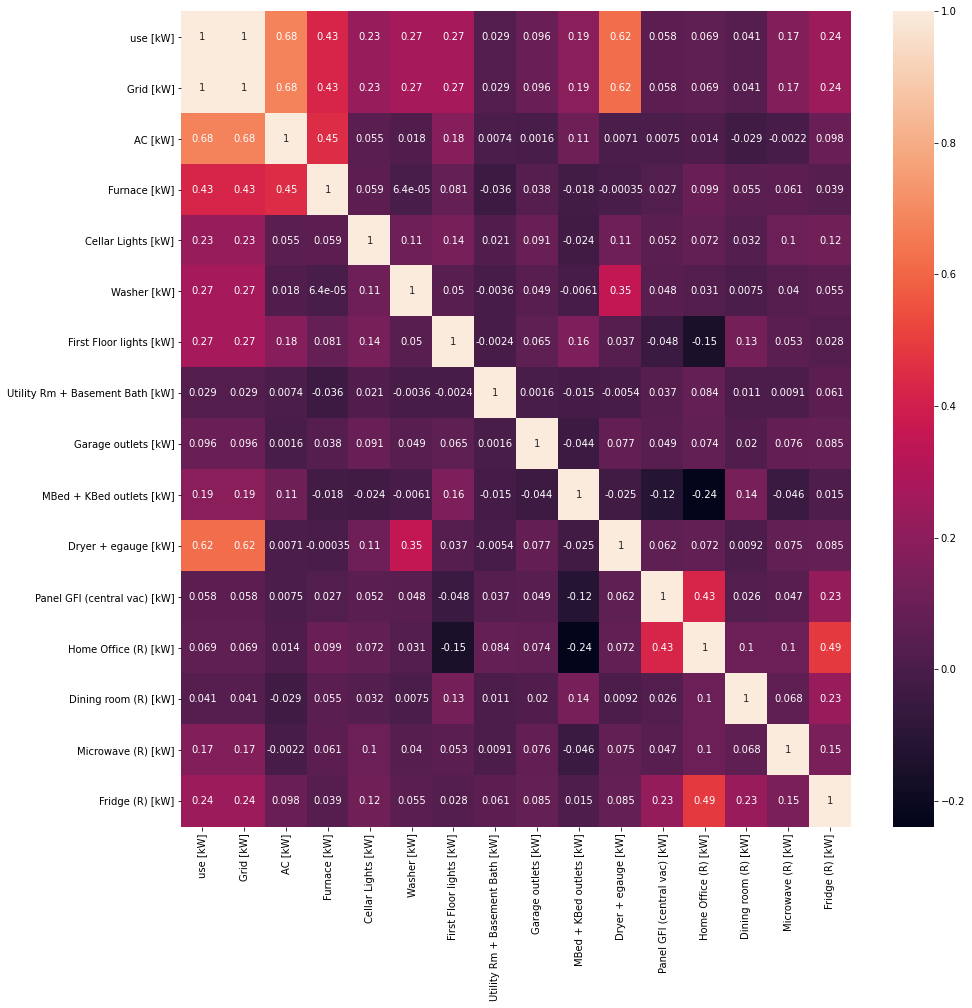

In [43]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(energy.drop(columns='gen [kW]').corr(),annot=True)

In here we can found some interesting thing. AC and dryer has huge correlation with overall power usage. We can say that AC and dryer are two of the most hihgest power usage devices at home.

Washer and dryer has outstanding correlation. This might cause by people will normally dry clothes after wash them.

Bed outlets and office power usage has negative correlation. This can be easily understand as "When people are working, they are actually working, not sitting in their bed room"

Office and panel GFI has high correlation. If a house has an office, then most of the high power usage small electronic devices will be installed there, such as printer, desktop, lamp, laptop, etc. So it make some sense and also let us know how people's office setting are.

#### When does fridge has highe power usage?

In [44]:
day.sort_values('Fridge (R) [kW]',ascending=False).head(10)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
8538,38.95,cloudy,0.76,10.00,Overcast,1026.88,4.63,1.00,2014-12-22 18:00:00,48.0,0.0000,32.00,0.00,2014-12-22 18:00:00,1.139691,0.0,1.139691,0.000875,0.199939,0.029972,0.018366,0.031158,0.002211,0.004813,0.054416,0.000154,0.000442,0.034369,0.026972,0.217766,0.322519
8095,34.93,clear-night,0.59,10.00,Clear,1022.05,7.34,0.07,2014-12-04 07:00:00,266.0,0.0000,22.21,0.00,2014-12-04 07:00:00,1.013550,0.0,1.013550,0.002026,0.405178,0.007181,0.000131,0.003508,0.002059,0.004973,0.055764,0.000078,0.000434,0.002881,0.000922,0.004130,0.282797
8506,29.61,clear-night,0.87,6.94,Clear,1025.51,4.99,NaN,2014-12-21 10:00:00,2.0,0.0000,26.12,0.00,2014-12-21 10:00:00,0.759156,0.0,0.759156,0.001949,0.371279,0.007067,0.000164,0.003520,0.002028,0.004871,0.055767,0.000077,0.000361,0.004977,0.005227,0.004351,0.277024
4426,68.54,rain,0.90,8.48,Light Rain,1015.67,3.88,0.31,2014-07-04 11:00:00,246.0,0.0095,65.58,0.49,2014-07-04 11:00:00,1.860630,0.0,1.860630,0.000085,0.009138,0.042446,0.000386,0.030743,0.004980,0.004656,0.022252,0.128100,0.006988,0.093433,0.010023,0.006497,0.275521
2436,47.65,clear-day,0.79,9.19,Clear,1021.90,3.70,0.00,2014-04-12 13:00:00,293.0,0.0000,41.37,0.00,2014-04-12 13:00:00,0.652736,0.0,0.652736,0.000052,0.009977,0.005516,0.000248,0.003612,0.003744,0.012229,0.001431,0.156413,0.007358,0.069059,0.004664,0.180355,0.273217
5390,67.30,rain,0.90,3.88,Rain,1007.82,8.28,NaN,2014-08-13 15:00:00,88.0,0.1106,64.23,0.79,2014-08-13 15:00:00,0.821116,0.0,0.821116,0.000039,0.009564,0.005559,0.000083,0.003527,0.003777,0.004823,0.001747,0.000093,0.006753,0.070526,0.002998,0.004348,0.268757
7544,33.61,clear-night,0.88,8.98,Clear,1021.20,1.80,0.00,2014-11-11 08:00:00,125.0,0.0000,30.53,0.00,2014-11-11 08:00:00,0.871609,0.0,0.871609,0.001344,0.269074,0.007122,0.000186,0.003541,0.002136,0.004896,0.055464,0.000097,0.000366,0.003069,0.000938,0.004502,0.268646
296,28.79,clear-night,0.81,9.93,Clear,1017.89,4.32,0.00,2014-01-13 08:00:00,219.0,0.0000,23.64,0.00,2014-01-13 08:00:00,1.580717,0.0,1.580717,0.000829,0.120582,0.055497,0.000257,0.003755,0.003904,0.005072,0.009444,0.145594,0.007316,0.076123,0.003829,0.065245,0.268413
8725,19.66,clear-day,0.65,9.96,Clear,1028.02,4.89,0.00,2014-12-30 13:00:00,306.0,0.0000,9.99,0.00,2014-12-30 13:00:00,0.628823,0.0,0.628823,0.000065,0.009738,0.007070,0.000397,0.003691,0.002334,0.004754,0.115062,0.000246,0.000378,0.004780,0.002353,0.052287,0.266383
4233,68.65,partly-cloudy-day,0.94,8.95,Partly Cloudy,1009.53,1.62,0.31,2014-06-26 10:00:00,300.0,0.0000,66.79,0.00,2014-06-26 10:00:00,2.033569,0.0,2.033569,1.506419,0.255810,0.045389,0.000023,0.003327,0.017762,0.007824,0.001604,0.000071,0.007122,0.077999,0.004453,0.007134,0.266052


In [45]:
night.sort_values('Fridge (R) [kW]',ascending=False).head(10)

,temperature,icon,humidity,visibility,summary,pressure,windSpeed,cloudCover,time,windBearing,precipIntensity,dewPoint,precipProbability,Date & Time,use [kW],gen [kW],Grid [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW]
7703,38.47,rain,0.94,4.19,Light Rain,999.84,1.53,NaN,2014-11-17 23:00:00,12.0,0.0364,36.99,0.67,2014-11-17 23:00:00,1.031056,0.0,1.031056,0.001339,0.208153,0.006633,0.000433,0.143309,0.002292,0.004946,0.070985,0.000240,0.000529,0.045067,0.014108,0.004442,0.371192
7821,39.06,clear-day,0.30,9.96,Clear,1021.81,10.50,0.20,2014-11-22 21:00:00,198.0,0.0000,10.18,0.00,2014-11-22 21:00:00,0.917174,0.0,0.917174,0.001966,0.377364,0.006969,0.000147,0.031527,0.002023,0.004704,0.052049,0.000124,0.000497,0.003591,0.014148,0.004192,0.340948
8571,40.05,clear-night,0.92,4.48,Clear,1021.17,6.55,NaN,2014-12-24 03:00:00,20.0,0.0008,37.83,0.01,2014-12-24 03:00:00,0.440065,0.0,0.440065,0.000011,0.009453,0.006869,0.000280,0.003710,0.002378,0.004969,0.056639,0.000186,0.000377,0.004774,0.005984,0.004869,0.311667
7757,28.28,clear-night,0.46,9.93,Clear,1017.53,9.12,0.00,2014-11-20 05:00:00,205.0,0.0000,10.32,0.00,2014-11-20 05:00:00,0.608246,0.0,0.608246,0.001031,0.196773,0.006972,0.000269,0.003682,0.002196,0.004754,0.071439,0.000171,0.000417,0.003223,0.001585,0.006740,0.289679
7819,40.01,clear-day,0.28,10.00,Clear,1022.93,11.79,0.02,2014-11-22 19:00:00,201.0,0.0000,9.34,0.00,2014-11-22 19:00:00,0.462725,0.0,0.462725,0.000055,0.009446,0.006881,0.000266,0.031851,0.002359,0.004711,0.052222,0.000199,0.000380,0.003213,0.014474,0.004903,0.285942
3501,80.13,clear-day,0.39,10.00,Clear,1009.94,6.18,0.13,2014-05-26 22:00:00,263.0,0.0000,53.05,0.00,2014-05-26 22:00:00,0.855891,0.0,0.855891,0.001742,0.009167,0.005014,0.000153,0.028511,0.410237,0.004718,0.001796,0.000073,0.007028,0.070239,0.004927,0.004901,0.276258
4434,65.37,rain,0.90,4.77,Rain,1014.41,7.50,0.31,2014-07-04 19:00:00,10.0,0.0627,62.37,0.73,2014-07-04 19:00:00,3.226142,0.0,3.226142,1.021383,0.232929,0.005093,0.001098,0.096290,0.003770,0.004854,0.087517,1.091992,0.007432,0.070907,0.005027,0.013737,0.269784
2300,55.96,clear-day,0.21,10.00,Clear,1019.68,7.37,0.00,2014-04-06 21:00:00,300.0,0.0000,17.12,0.00,2014-04-06 21:00:00,0.543058,0.0,0.543058,0.000064,0.009693,0.022401,0.000054,0.016914,0.003871,0.004874,0.001631,0.000103,0.007244,0.073079,0.004303,0.004796,0.266714
8707,37.92,clear-day,0.44,10.00,Clear,1019.76,11.29,0.20,2014-12-29 19:00:00,290.0,0.0000,17.90,0.00,2014-12-29 19:00:00,0.556638,0.0,0.556638,0.000076,0.009555,0.006938,0.000367,0.031173,0.002356,0.004793,0.098450,0.000199,0.000354,0.004877,0.034807,0.004930,0.265478
5229,78.14,clear-day,0.43,10.00,Clear,1009.99,9.49,0.03,2014-08-06 22:00:00,326.0,0.0000,53.89,0.00,2014-08-06 22:00:00,1.724415,0.0,1.724415,1.029346,0.222154,0.005024,0.000538,0.028458,0.003726,0.004771,0.168696,0.000111,0.006763,0.072064,0.003061,0.004238,0.265027


In [46]:
day['Fridge (R) [kW]'].describe()

count    4745.000000
mean        0.075409
std         0.062485
min         0.000000
25%         0.006589
50%         0.074339
75%         0.135606
max         0.322519
Name: Fridge (R) [kW], dtype: float64

In [47]:
night['Fridge (R) [kW]'].describe()

count    4015.000000
mean        0.070890
std         0.061468
min         0.000000
25%         0.006508
50%         0.064969
75%         0.122706
max         0.371192
Name: Fridge (R) [kW], dtype: float64

Using descibe, we can see than median and mean are both around 0.07 with std 0.06. So we know that the max values are some sort of outliers. The fridge that family use might be old or doesn't perform correctly.

So based on the outlier, our sort result might not be correct at all, beside there are only 0.005 difference between mean of day and night. So people use fridge in day time a little more than night time. The reasonablt guess will be people open fridge to cook before 18:00 so that cause slitly more energy usage than night.